<a href="https://colab.research.google.com/github/adithya36/Used_Cars_Price_Prediction/blob/main/vehicles_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import
*   libraries
*   drive
*   df

In [ ]:
#import package
import pandas as pd
import numpy as np
import seaborn as sns

!pip install fuzzywuzzy[speedup]
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [ ]:
import matplotlib.pyplot as plt
!pip install plotly
!pip install cufflinks
import plotly.express as px
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`



In [ ]:
!pip install geopandas
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [ ]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df = pd.read_csv("filepath_or_buffer", index_col=None)
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/vehicles.csv", index_col=0)
#df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/cars.csv", index_col=0)

# df1: **vehicles.csv**
*   describe
*   clean





In [ ]:
df = df1

In [ ]:
#get number of rows & cols
df.shape

(426880, 25)

In [ ]:
#get number of elements
df.size

10672000

In [ ]:
#get head
df.head(n=5)

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,,,,,
7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           426880 non-null  object 
 1   region        426880 non-null  object 
 2   region_url    426880 non-null  object 
 3   price         426880 non-null  int64  
 4   year          425675 non-null  float64
 5   manufacturer  409234 non-null  object 
 6   model         421603 non-null  object 
 7   condition     252776 non-null  object 
 8   cylinders     249202 non-null  object 
 9   fuel          423867 non-null  object 
 10  odometer      422480 non-null  float64
 11  title_status  418638 non-null  object 
 12  transmission  424324 non-null  object 
 13  VIN           265838 non-null  object 
 14  drive         296313 non-null  object 
 15  size          120519 non-null  object 
 16  type          334022 non-null  object 
 17  paint_color   296677 non-null  obje

In [ ]:
#get descriptive stats
df.describe()

,price,year,odometer,county,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [ ]:
#get sum nan
df.isna().sum()

url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [ ]:
#get sum non nan
df.notnull().sum()

url             426880
region          426880
region_url      426880
price           426880
year            425675
manufacturer    409234
model           421603
condition       252776
cylinders       249202
fuel            423867
odometer        422480
title_status    418638
transmission    424324
VIN             265838
drive           296313
size            120519
type            334022
paint_color     296677
image_url       426812
description     426810
county               0
state           426880
lat             420331
long            420331
posting_date    426812
dtype: int64

In [ ]:
#drop rows: sum nan <19
df = df[df.isnull().sum(axis=1) < 19]
df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,,,,,
7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [ ]:
#drop cols: county, url, region_url, image_url, description
df.drop('county', axis=1, inplace=True)
df.drop('url', axis=1, inplace=True)
df.drop('region_url', axis=1, inplace=True)
df.drop('image_url', axis=1, inplace=True)
df.drop('VIN', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,
7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al,32.590,-85.4800,2021-05-04T12:31:18-0500
7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al,32.590,-85.4800,2021-05-04T12:31:08-0500
7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T12:31:25-0500
7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al,32.590,-85.4800,2021-05-04T10:41:31-0500
7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [ ]:
#float to int: year
df['year'] = df['year'].astype('Int32') 
assert df['year'].dtype == 'Int32'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#str to int: cylinder
df['cylinders'] = df['cylinders'].str.replace('cylinders',' ')
df['cylinders'] = df['cylinders'].str.strip()
df['cylinders'] = df['cylinders'].replace('nan',np.nan)
df['cylinders'] = df['cylinders'].replace('other', np.nan) #--> merge nan and other
df['cylinders'] = df['cylinders'].astype('float') 
df['cylinders'] = df['cylinders'].astype('Int32')
df['cylinders'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

<IntegerArray>
[8, 6, <NA>, 4, 5, 3, 10, 12]
Length: 8, dtype: Int32

In [ ]:
#remove duplicate rows
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(426786, 19)

In [ ]:
#categorize nan
df['manufacturer'] = df['manufacturer'].replace('nan',np.nan)
df['model'] = df['model'].replace('nan',np.nan)
df['condition'] = df['condition'].replace('nan',np.nan)
df['fuel'] = df['fuel'].replace('nan',np.nan)
df['title_status'] = df['title_status'].replace('nan',np.nan)
df['transmission'] = df['transmission'].replace('nan',np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

3736928711
0
75212.57492513812
13950.0


In [ ]:
df = df[df['condition'] != 'salvage'] 

In [ ]:
def condition_to_numeric(x):
  if x=='new': return 5
  if x=='like new': return 4
  if x=='excellent': return 3
  if x=='good': return 2
  if x=='fair': return 1
  #if x=='salvage': return 0 #--> ditch
  if x=='nan': return np.nan

df['condition_num'] = df['condition'].apply(condition_to_numeric)
df['condition_num'].unique()

array([ 2.,  3.,  1., nan,  4.,  5.])

                  price      year  cylinders  ...       lat      long  condition_num
price          1.000000 -0.001559   0.005966  ...  0.004002 -0.008107       0.000458
year          -0.001559  1.000000  -0.198727  ... -0.011522  0.029539       0.261701
cylinders      0.005966 -0.198727   1.000000  ... -0.034914  0.020283      -0.072406
odometer       0.000631 -0.089536   0.040204  ... -0.008524 -0.000673      -0.094204
lat            0.004002 -0.011522  -0.034914  ...  1.000000 -0.044249      -0.068716
long          -0.008107  0.029539   0.020283  ... -0.044249  1.000000      -0.026266
condition_num  0.000458  0.261701  -0.072406  ... -0.068716 -0.026266       1.000000

[7 rows x 7 columns]


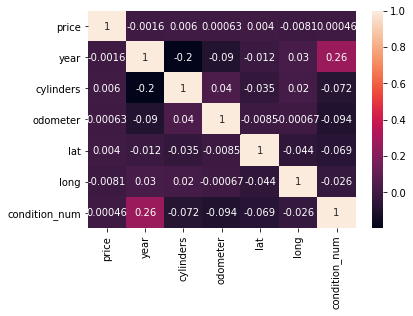

In [ ]:
#corr matrix
df = df.dropna()
print(df.corr())
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#corr p-value
from scipy.stats import pearsonr
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues
calculate_pvalues(df)

,price,year,cylinders,odometer,lat,long,condition_num
price,0,0.6622,0.0945,0.8596,0.2621,0.0231,0.8979
year,0.6622,0,0,0,0.0012,0,0
cylinders,0.0945,0,0,0,0,0,0
odometer,0.8596,0,0,0,0.0169,0.8504,0
lat,0.2621,0.0012,0,0.0169,0,0,0
long,0.0231,0,0,0.8504,0,0,0
condition_num,0.8979,0,0,0,0,0,0


In [ ]:
#corr p-value check
pearsonr(df['year'], df['condition_num'])

(0.2617006297540252, 0.0)

In [ ]:
df.pivot_table(values='price', index='state',aggfunc=[np.mean, np.median, np.max, np.min])

,mean,median,amax,amin
,price,price,price,price
state,,,,
ak,2.417406e+04,20500.0,116000,0
al,1.549109e+04,10950.0,140000,0
ar,1.175422e+04,7500.0,87700,0
az,1.359250e+04,10000.0,123456,0
ca,1.464905e+05,9399.5,1111111111,0
co,1.206931e+04,8995.0,150000,0
ct,9.747179e+03,6495.0,76000,0
dc,1.022728e+04,7495.0,89000,1


In [ ]:
df = df[df['price'] >=50] #-->e.g.
df.pivot_table(values='price', index='state',aggfunc=[np.mean, np.median, np.max, np.min])

,mean,median,amax,amin
,price,price,price,price
state,,,,
ak,2.436744e+04,20999.0,116000,450
al,1.664285e+04,11990.0,140000,300
ar,1.513833e+04,10500.0,87700,499
az,1.366908e+04,10000.0,123456,100
ca,1.538481e+05,9962.5,1111111111,55
co,1.221331e+04,9000.0,150000,500
ct,1.071855e+04,6995.0,76000,600
dc,1.024859e+04,7495.0,89000,65


Text(0, 0.5, 'Sales adverts')

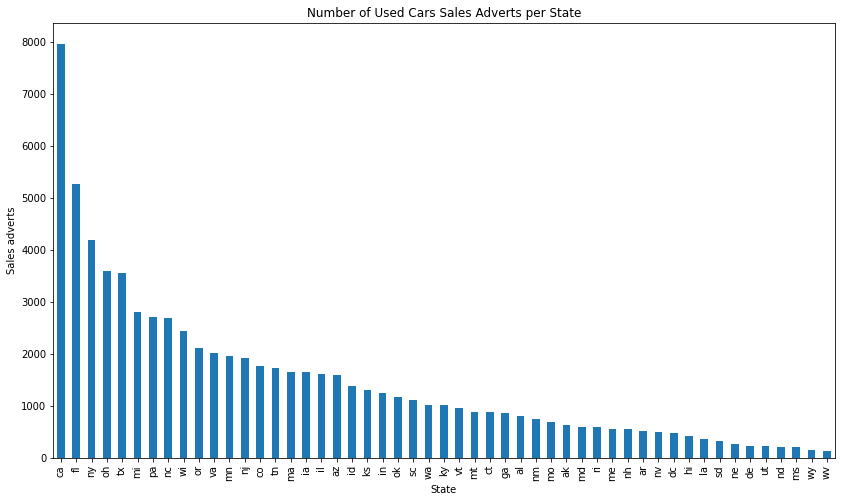

In [ ]:
#distribution bar chart --> state/sales adverts
plt = df['state'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Used Cars Sales Adverts per State")
plt.set_xlabel("State")
plt.set_ylabel("Sales adverts")

Text(0, 0.5, 'Sales adverts')

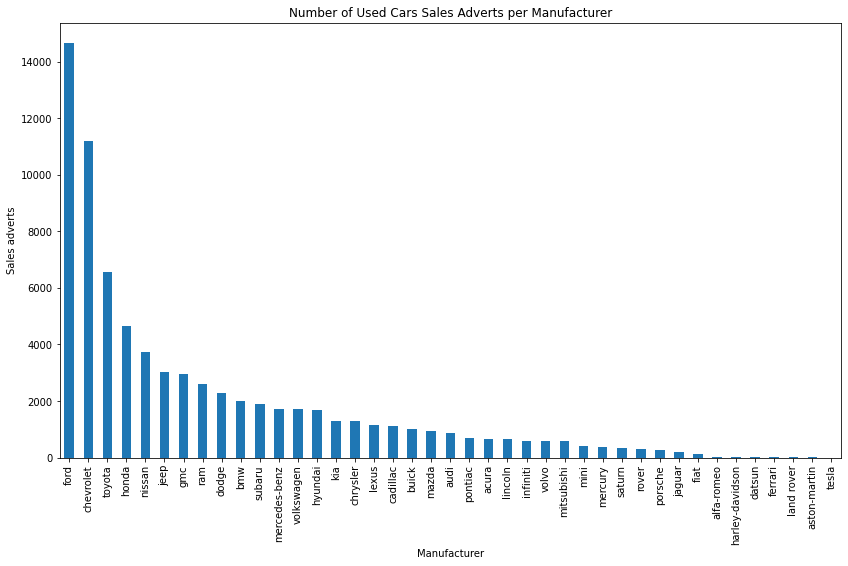

In [ ]:
#distribution bar chart --> brand/sales adverts
ax = df['manufacturer'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Used Cars Sales Adverts per Manufacturer")
ax.set_xlabel("Manufacturer")
ax.set_ylabel("Sales adverts")

state
ak    2.436744e+04
al    1.664285e+04
ar    1.513833e+04
az    1.366908e+04
ca    1.538481e+05
co    1.221331e+04
ct    1.071855e+04
dc    1.024859e+04
de    1.454017e+04
fl    1.457008e+04
ga    1.367658e+04
hi    1.872997e+04
ia    1.474016e+04
id    1.171987e+05
il    1.203556e+04
in    1.265876e+04
ks    1.307595e+04
ky    1.541606e+04
la    1.208111e+04
ma    1.240314e+04
md    1.171237e+04
me    1.550567e+04
mi    1.589344e+04
mn    1.420911e+04
mo    1.562962e+04
ms    1.856874e+04
mt    1.812053e+04
nc    6.568202e+04
nd    1.856480e+04
ne    1.532738e+04
nh    1.236299e+04
nj    1.091648e+04
nm    1.532211e+04
nv    1.270475e+04
ny    1.333508e+04
oh    1.003372e+04
ok    1.215349e+05
or    1.780328e+06
pa    1.090844e+04
ri    1.113217e+04
sc    1.490195e+04
sd    1.791049e+04
tn    1.840367e+04
tx    1.377406e+04
ut    2.007528e+04
va    1.293593e+04
vt    1.726590e+04
wa    1.138361e+04
wi    1.498340e+04
wv    1.614707e+04
wy    1.943870e+04
Name: price, dtype: float

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



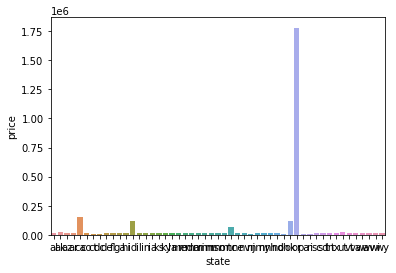

In [ ]:
#distribution bar chart --> state/ASP
print(df.groupby('state', as_index=True)['price'].mean())
plt2 = sns.barplot('state', 'price', data=df, ci=False)

       manufacturer          price
0             acura    9755.484115
1        alfa-romeo   21795.964286
2      aston-martin   53367.000000
3              audi   14410.392065
4               bmw   13511.438939
5             buick  133436.023139
6          cadillac   12517.028597
7         chevrolet   15782.675234
8          chrysler    7926.808903
9            datsun   14237.615385
10            dodge   11595.129427
11          ferrari  102163.666667
12             fiat    9177.891667
13             ford   93037.468914
14              gmc   61461.688110
15  harley-davidson   14975.333333
16            honda    8926.062554
17          hyundai    8277.931614
18         infiniti   12639.224109
19           jaguar   14753.126829
20             jeep   14628.017845
21              kia    8603.468654
22       land rover   18116.875000
23            lexus   13781.096354
24          lincoln   10983.658842
25            mazda    8486.379459
26    mercedes-benz   15099.656863
27          mercury 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



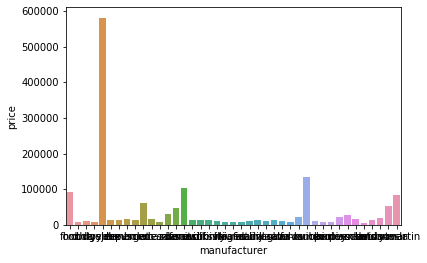

In [ ]:
#distribution bar chart --> manufacturer/ASP
print(df.groupby('manufacturer', as_index=False)['price'].mean()) #check ferrari etc. 100k > subset drop and graph
plt2 = sns.barplot('manufacturer', 'price', data=df, ci=False)

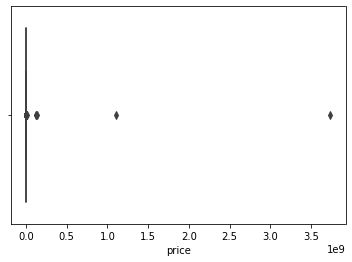

In [ ]:
#detect and remove outliers
sns.boxplot(x=df['price'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price              12500
year                   9
cylinders              4
odometer           81266
lat              7.21685
long             25.0668
condition_num          1
dtype: object


In [ ]:
print(df < (Q1 - 1.5 * IQR))

            condition  condition_num  cylinders  ...  transmission   type   year
id                                               ...                            
7316356412      False          False      False  ...         False  False  False
7314560853      False          False      False  ...         False  False  False
7313406529      False          False      False  ...         False  False  False
7312847466      False          False      False  ...         False  False  False
7312144944      False          False      False  ...         False  False  False
...               ...            ...        ...  ...           ...    ...    ...
7303112347      False          False      False  ...         False  False  False
7302963673      False          False      False  ...         False  False  False
7302963273      False          False      False  ...         False  False   True
7302384818      False          False      False  ...         False  False   True
7302338378      False       

In [ ]:
print(df > (Q3 + 1.5 * IQR))

            condition  condition_num  cylinders  ...  transmission   type   year
id                                               ...                            
7316356412      False          False      False  ...         False  False  False
7314560853      False          False      False  ...         False  False  False
7313406529      False          False      False  ...         False  False  False
7312847466      False          False      False  ...         False  False  False
7312144944      False          False      False  ...         False  False  False
...               ...            ...        ...  ...           ...    ...    ...
7303112347      False          False      False  ...         False  False  False
7302963673      False          False      False  ...         False  False  False
7302963273      False          False      False  ...         False  False  False
7302384818      False          False      False  ...         False  False  False
7302338378      False       

In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_out.shape

(64503, 20)

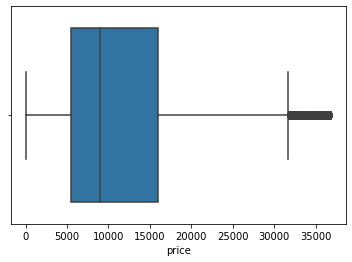

In [ ]:
sns.boxplot(x=df_out['price'])

       manufacturer         price
0             acura   9220.546326
1        alfa-romeo  27974.062500
2      aston-martin  32900.000000
3              audi  12701.591022
4               bmw  11790.087662
5             buick   8508.660571
6          cadillac  10734.482030
7         chevrolet  13109.769231
8          chrysler   7511.527823
9             dodge   9532.337302
10             fiat   8666.783505
11             ford  13849.711204
12              gmc  15816.981320
13  harley-davidson  14821.150000
14            honda   8742.202020
15          hyundai   8129.555419
16         infiniti  11729.321555
17           jaguar  10848.739394
18             jeep  13008.784387
19              kia   8319.646178
20       land rover   6990.000000
21            lexus  12720.188732
22          lincoln   9906.559567
23            mazda   8561.431946
24    mercedes-benz  12484.216370
25          mercury   4188.946032
26             mini   8986.989924
27       mitsubishi  12085.126894
28           n

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



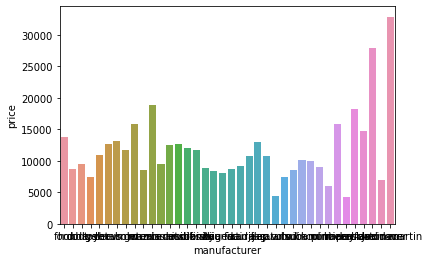

In [ ]:
print(df_out.groupby('manufacturer', as_index=False)['price'].mean()) 
plt2 = sns.barplot('manufacturer', 'price', data=df_out, ci=False)

In [ ]:
print(df_out['price'].max())
print(df_out['price'].min())
print(df_out['price'].mean())
print(df_out['price'].median())

36739
50
11685.65181464428
8999.0


In [ ]:
#drop columns
#keep: fuel, gear, year, odometer, price, manufacturer
df = df_out.drop(['region', 'model','condition','cylinders','title_status','drive','size','type','size','paint_color','state','lat','long','posting_date','condition_num'], axis=1)

In [ ]:
#change col names
df = df.rename(columns={'transmission': 'gear', 'manufacturer' : 'manufacturer_name'})

In [ ]:
df['country'] = 'US'

In [ ]:
#get final info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64503 entries, 7316356412 to 7302338378
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              64503 non-null  int64  
 1   year               64503 non-null  Int32  
 2   manufacturer_name  64503 non-null  object 
 3   fuel               64503 non-null  object 
 4   odometer           64503 non-null  float64
 5   gear               64503 non-null  object 
 6   country            64503 non-null  object 
dtypes: Int32(1), float64(1), int64(1), object(4)
memory usage: 6.3+ MB


In [ ]:
df['gear'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [ ]:
df['fuel'].unique()

array(['gas', 'diesel', 'hybrid', 'other', 'electric'], dtype=object)

In [ ]:
df['manufacturer_name'] = df['manufacturer_name'].str.lower()
df['manufacturer_name'].unique()

array(['ford', 'honda', 'dodge', 'chrysler', 'toyota', 'lexus',
       'chevrolet', 'bmw', 'gmc', 'mazda', 'ram', 'nissan',
       'mercedes-benz', 'audi', 'mitsubishi', 'infiniti', 'volkswagen',
       'kia', 'hyundai', 'fiat', 'acura', 'cadillac', 'jeep', 'jaguar',
       'saturn', 'volvo', 'buick', 'subaru', 'lincoln', 'mini', 'pontiac',
       'rover', 'mercury', 'porsche', 'harley-davidson', 'alfa-romeo',
       'land rover', 'aston-martin'], dtype=object)

In [ ]:
df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/data/vehicles_clean.csv', index = False)